In [1]:
# Import necessary libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
import re
from datetime import datetime
import numpy as np

In [2]:
df = pd.read_csv("youtube_data.csv")

In [3]:
# Views overtime by Channel

In [4]:
# Preparing for plotting
#Since the views of Nick are way higher than Joshua and Guga, we need to filter him.
df['view_count'] = df['view_count'].astype(int)
df_without_nick = df[df["channel_name"] != "Nick DiGiovanni"]
df['published'] = pd.to_datetime(df['published'])
# We want to "standarized" when both channel started to take off and 2019 seems that's a good year to start.
df_without_nick = df_without_nick[df_without_nick['published'] > '01/01/2019']

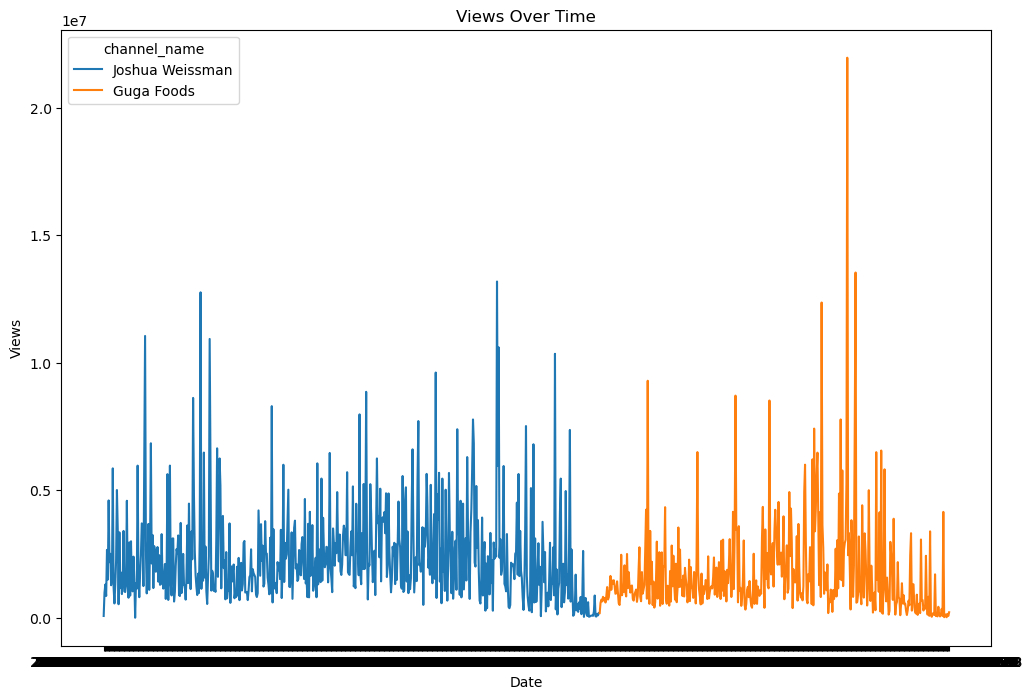

In [5]:
# Plotting
plt.figure(figsize=(12, 8)) 
sns.lineplot(x='published', y='view_count', hue='channel_name', data=df_without_nick, palette='tab10')
plt.title('Views Over Time')
plt.xlabel('Date')
plt.ylabel('Views') 
plt.show()
#They're pretty similar and we can start more asking more following questions.

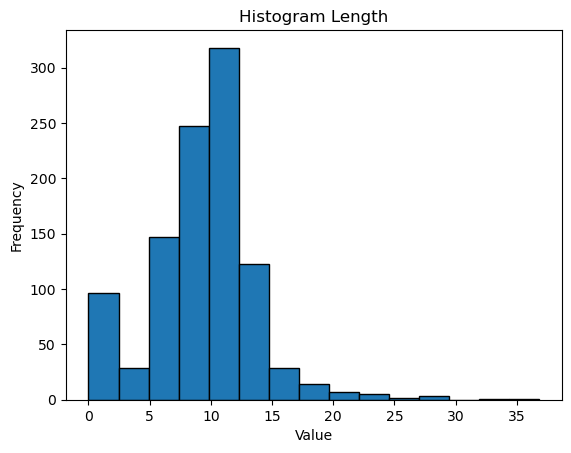

In [6]:
#Lenght of Videos?
plt.hist(df_without_nick['duration_in_minutes'], bins=15, edgecolor='black')
plt.title('Histogram Length')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [7]:
# We can learn from this distribution that "shorts" are included here
# We need to separate "shorts" from actual "youtube videos"
# According to YouTube the max length of a "short" is 1 minute
df_without_nick['short'] = np.where(df_without_nick['duration_in_minutes'] <= 1, 'yes', 'no')
df_short = df_without_nick[df_without_nick['short']== 'yes']
df_cleaned = df_without_nick[df_without_nick['short']== 'no']

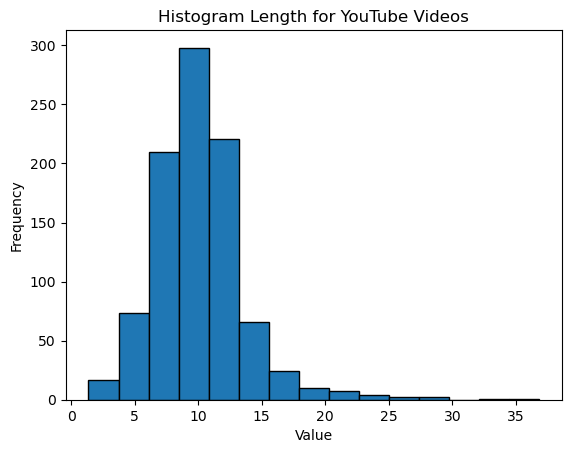

In [8]:
plt.hist(df_cleaned['duration_in_minutes'], bins=15, edgecolor='black')
plt.title('Histogram Length for YouTube Videos')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Avg view by year per channel
# Create year to simplify groupying
df_cleaned["year"] = df_cleaned['published'].dt.year
# Calculation
mean_view_count_by_year_channel= df_cleaned.groupby(["year", "channel_name"])["view_count"].mean()
# Plot

# Create a bar chart
mean_view_count_by_year_channel.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('Mean View Count by Year and Channel Name')
plt.xlabel('Year, Channel Name')
plt.ylabel('Mean View Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed

# Show the plot
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# When they usually submit a video?
df_cleaned.groupby(["day_published"]).size().reset_index(name='count')

In [ ]:
df_cleaned.groupby(["day_published"])["view_count"].mean()
# We can confirm the previous table, it's interesting that both YouTubers submit videos the same days.

In [ ]:
# Collaboration boost videos?
# How many videos have collaboration?
df_cleaned.groupby(["collaboration"]).size()

In [ ]:
df_cleaned.groupby(["collaboration"])["view_count"].mean()

In [ ]:
# More comments = more views?
#Extract the data from the DataFrame
x_data = df_cleaned['comment_count']
y_data = df_cleaned['view_count']

# Create a scatter plot
plt.scatter(x_data, y_data)

# Customize the plot
plt.title('Scatter Plot')
plt.xlabel('Comments')
plt.ylabel('Views')

# Show the plot
plt.show()